In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [49]:
print(df.info)


<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


In [50]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [51]:
# Checking null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [52]:
# Checking duplicated values
df.duplicated().sum()

3

In [53]:
# Removing duplicated values
df.drop_duplicates(inplace=True)
# Again checking duplicated values
df.duplicated().sum()

0

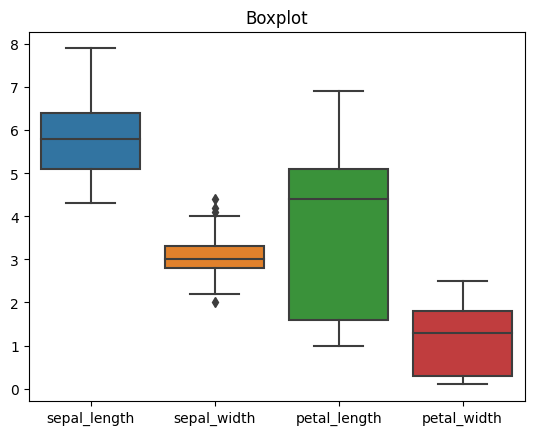

In [54]:
# Checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df)
plt.title("Boxplot")
plt.show()

Since, outliers are close to the other values and we have less records we will not remove them

In [55]:
df.species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

Exploratory Data Analysis

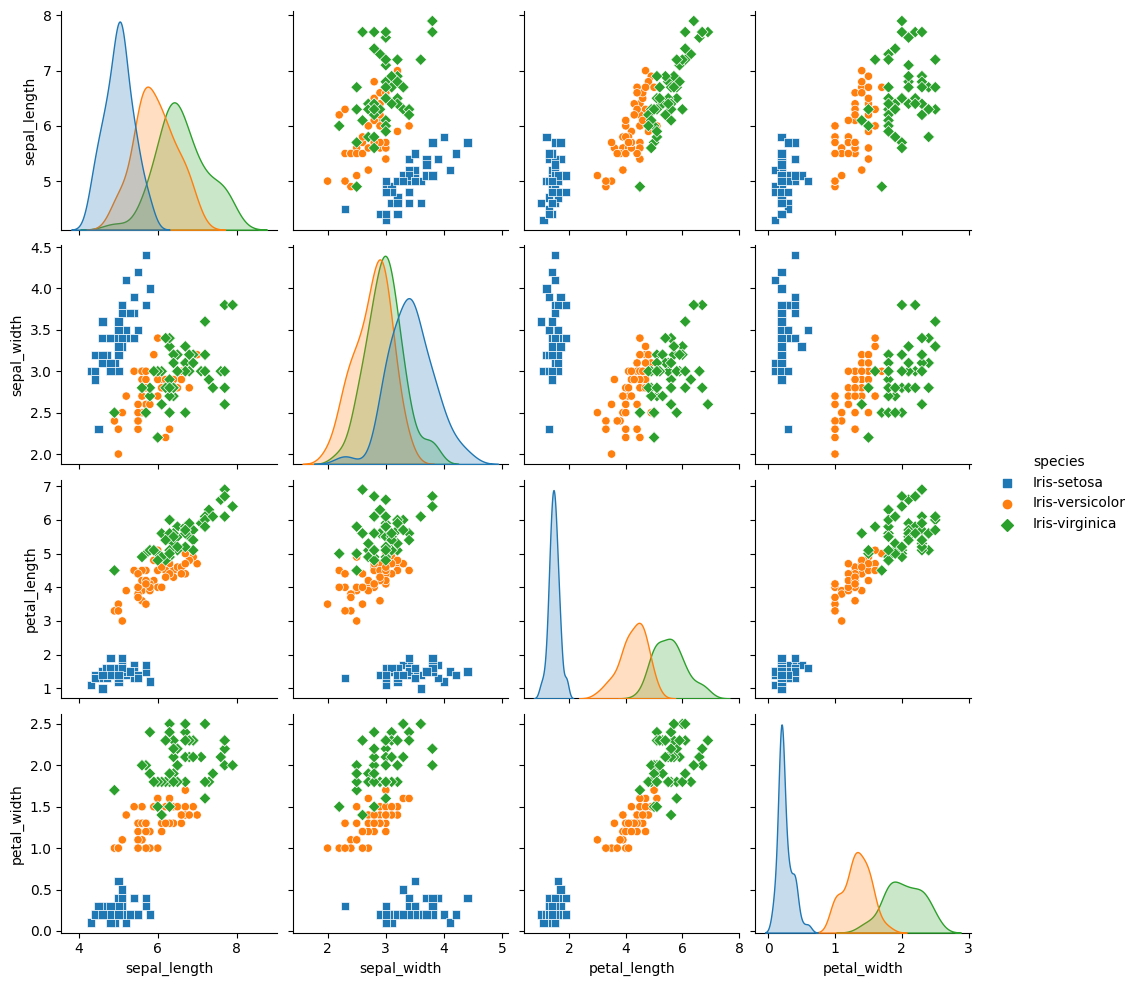

In [56]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue="species", markers=["s", "o", "D"])

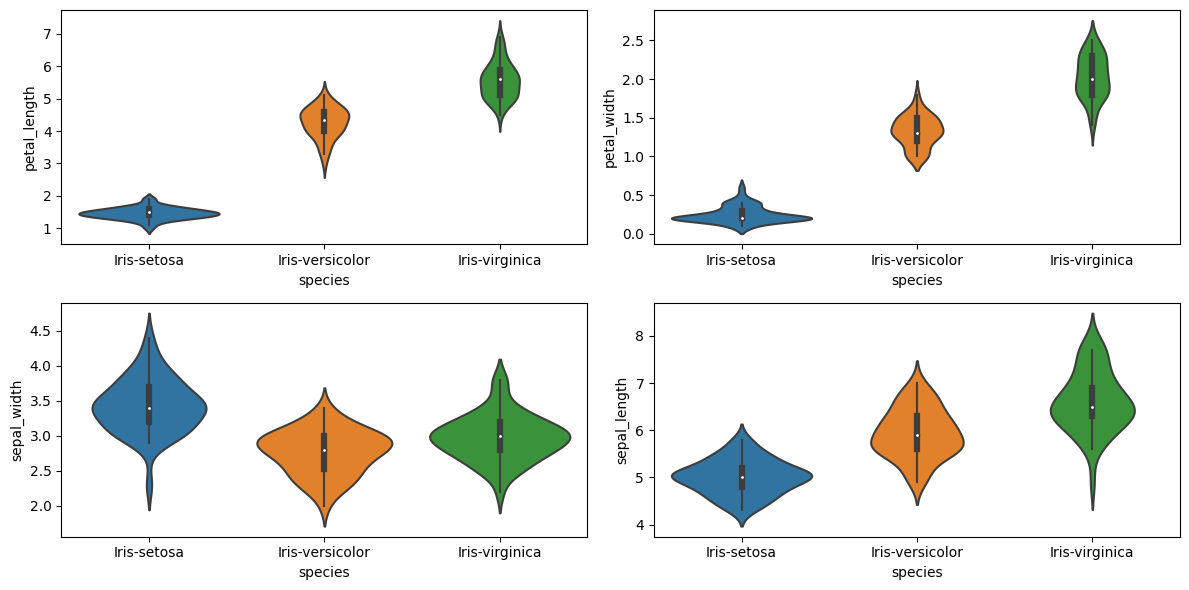

In [57]:
# Violin plot to visualize distribution and density by species
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x="species", y="petal_length", data=df)
plt.subplot(2, 2, 2)
sns.violinplot(x="species", y="petal_width", data=df)
plt.subplot(2, 2, 3)
sns.violinplot(x="species", y="sepal_width", data=df)
plt.subplot(2, 2, 4)
sns.violinplot(x="species", y="sepal_length", data=df)
plt.tight_layout()

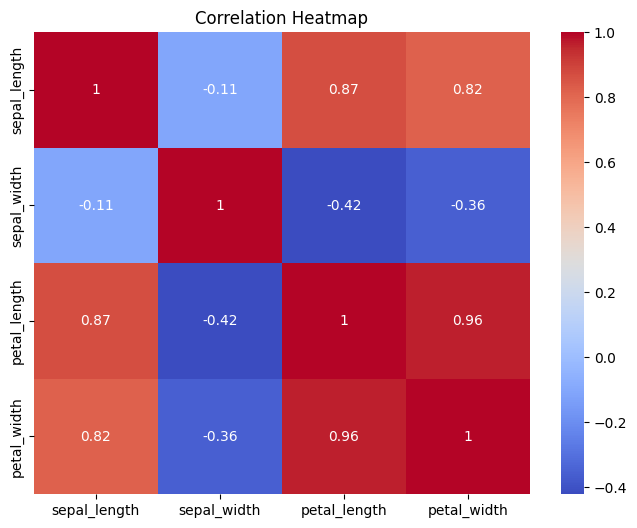

In [58]:
# Correlation heatmap
df1 = df.copy()
df1.drop("species", axis=1, inplace=True)
correlation = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [59]:
# Input features dataset
x = df.drop(columns="species", axis=1)
x


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [60]:
species_map = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
y = df['species'].map(species_map)
y


0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 147, dtype: int64

split data for training and testing

In [61]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [62]:
y_train

137    3
47     1
121    3
27     1
4      1
      ..
73     2
108    3
14     1
94     2
104    3
Name: species, Length: 117, dtype: int64

Logistic Regression:
	Accuracy: 0.9333333333333333
	Precision: 0.9296296296296296
	Recall: 0.9296296296296296
	F1 Score: 0.9296296296296296
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


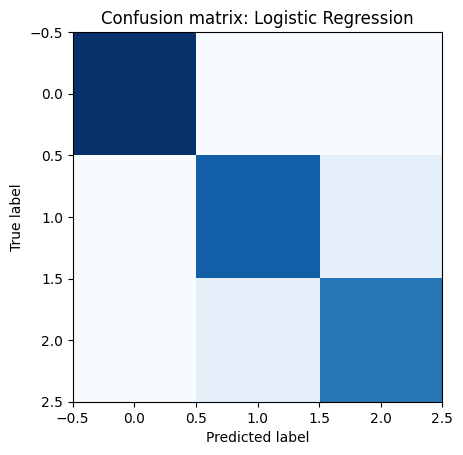

Decision Tree:
	Accuracy: 0.9666666666666667
	Precision: 0.9666666666666667
	Recall: 0.9666666666666667
	F1 Score: 0.9649122807017544
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


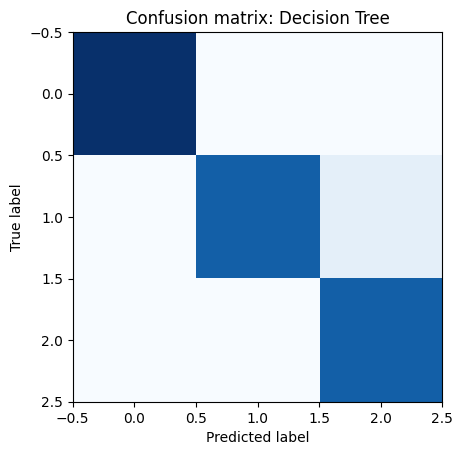

K-Nearest Neighbors:
	Accuracy: 0.9333333333333333
	Precision: 0.9296296296296296
	Recall: 0.9296296296296296
	F1 Score: 0.9296296296296296
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


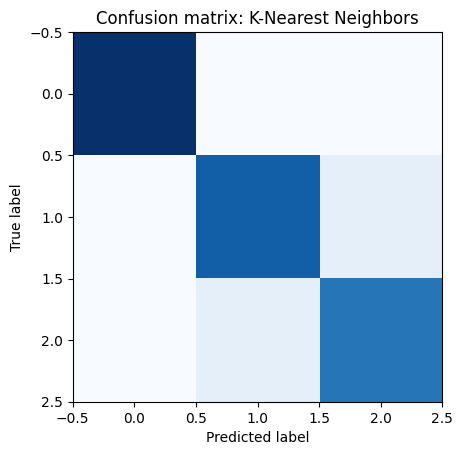

Support Vector Machine:
	Accuracy: 0.9333333333333333
	Precision: 0.9296296296296296
	Recall: 0.9296296296296296
	F1 Score: 0.9296296296296296
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


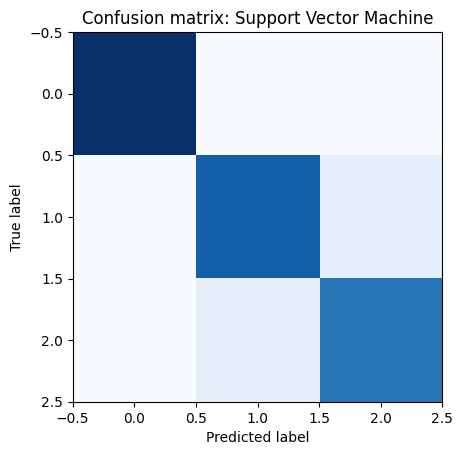

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Train the models and evaluate them
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f"{name}:\n\tAccuracy: {accuracy}\n\tPrecision: {precision}\n\tRecall: {recall}\n\tF1 Score: {f1}")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion matrix: {name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



Out of all these we found that decision trees perform the best with an accuracy of 96.6%